## EDA datasset de libros.

### El objetivo de este análisis es mejorar el dataset de libros, evaluar ratings , identificar patrones en categorías y revisar relaciones clave.


1. Comenzamos cargando el dataset y revisando sus primeras filas.


In [3]:
pip install pandas

In [4]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


2. Revisamos información general del dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


3. Vamos a revisar cuántos datos nulos
tenemos, y evaluamos qué hacemos con ellos, si eliminamos o imputamos estos datos.

In [6]:
df.isnull().sum()


,0
isbn13,0
isbn10,0
title,0
subtitle,4429
authors,72
categories,99
thumbnail,329
description,262
published_year,6
average_rating,43


Descubrimos que subtitle tiene más de 4000 valores nulos,que es el 65%, podríamos rellenar con algún texto como "no subtítulo" para mantenerlo, hay otros como authors, description y algunos más que también los tienen a menor cantidad.

In [7]:
df["subtitle"]=df["subtitle"].fillna("no subtitle")
df["authors"]=df["authors"].fillna("no authors")
df["description"]=df["description"].fillna("no description")
df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,0
authors,0
categories,99
thumbnail,329
description,0
published_year,6
average_rating,43


Categorías equivale al 1.4% los datos nulos, las eliminamos porque creo que podría afectar al análisis.  También eliminamos los 4 de published_year ya que son solo 4, una cantidad insignificante para nuestro análisis, después de valorar poner, moda o mediana decidimos eliminar porque podría afectar el análisis.

In [8]:
df = df.dropna(subset=["categories"])
df = df.dropna(subset=["published_year"])
df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,0
authors,0
categories,0
thumbnail,275
description,0
published_year,0
average_rating,39


Thumbnail no debería afectar al análisis numérico, así que lo rellenamos con "No image", de momento description también lo rellenaremos con "No description"

In [9]:
df["thumbnail"] = df["thumbnail"].fillna("No image")
df["description"] = df["description"].fillna("No description")
df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,0
authors,0
categories,0
thumbnail,0
description,0
published_year,0
average_rating,39


Los siguientes los vamos a rellenar con la mediana, ya que puede ser una buena solución para que no nos afecte en el análisis , así que aplicamos la mediana para dar equilibrio.

In [10]:
df["average_rating"] = df["average_rating"].fillna(df["average_rating"].median())
df["num_pages"] = df["num_pages"].fillna(df["num_pages"].median())
df["ratings_count"] = df["ratings_count"].fillna(df["ratings_count"].median())
df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,0
authors,0
categories,0
thumbnail,0
description,0
published_year,0
average_rating,0


In [11]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,no subtitle,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,no subtitle,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,no subtitle,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,no subtitle,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


Hacemos una copia del dataframe como se encuentra actualmente:

In [12]:
df = df.copy()

4. Utilizamos describe para obtener información estadística de las variables numéricas

In [13]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.707000e+03,6707.000000,6707.000000,6707.000000,6.707000e+03
mean,9.780674e+12,1998.752646,3.932412,347.042642,2.116976e+04
std,5.993662e+08,10.239633,0.330102,238.624682,1.381977e+05
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1997.000000,3.770000,208.000000,1.650000e+02
50%,9.780553e+12,2002.000000,3.950000,304.000000,1.034500e+03
75%,9.780809e+12,2005.000000,4.130000,417.000000,6.014500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


Hemos encontrado algunos hallazgos clave, como que el libro más antiguo es del año 1876 y el más reciente del 2019, la media de publicaciones es dek 1998 , eso nos quiere decir que la mayoría son relativamente modernos, también vemos el rating, las calificaciones, el máximo es de 5 y el mínimo de 0(a lo mejor porque no tiene reseñas), también vemos que hay algunos libros muy largos , hasta de 3342 páginas y posibles errores en el mínimo.



Lo primero vamos a convertir año de publicación y número de páginas a enteros ya que no tienen decimales:

In [14]:
df['published_year'] = df['published_year'].astype(int)
df['num_pages'] = df['num_pages'].astype(int)

Ahora vamos a comprobar los libros muy antiguos, ya que pueden ser un error.

In [15]:
old_books = df[(df['published_year'] >= 1800) & (df['published_year'] <= 1900)]
print(old_books[['title', 'authors', 'published_year', 'average_rating', 'num_pages']])

                                      title        authors  published_year  \
1004  The Letters of John and Abigail Adams  Abigail Adams            1876   
2151                         Daniel Deronda   George Eliot            1876   

      average_rating  num_pages  
1004            4.17        512  
2151            3.83        796  


In [16]:
print(f"Número de libros publicados entre 1800 y 1900: {len(old_books)}")

Número de libros publicados entre 1800 y 1900: 2


Vamos a dejar los libros antiguos en el análisis, ya que podría servir para identificar tendencias y cambios a lo largo del tiempo.

## Manejo de outliers

Identificación de outliers, utilizamos boxplots para visualizar la distribución de 'num_pages' y 'ratings_count' e identificar posibles outliers, es decir, valores atípicos, por ejemplo pueden haber libros con número de páginas extremadamente bajas o altas y eso puede distorsionar mi análisis.
Los boxplots son una herramienta que nos muestra la distribución del conjunto de los datos, si los puntos se encuentran más allá del bigote se consideran outliers.

Text(0.5, 1.0, 'Distribución de num_pages')

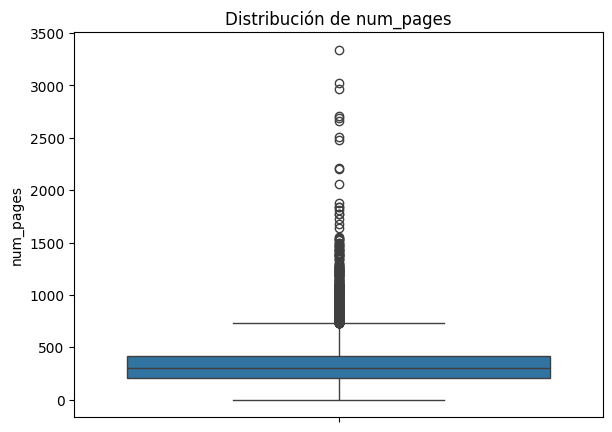

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['num_pages'])
plt.title('Distribución de num_pages')

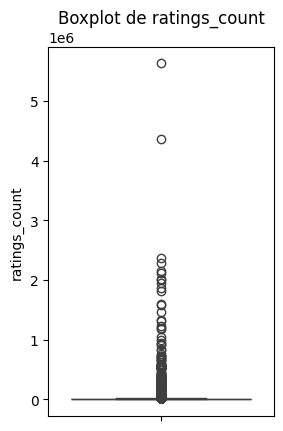

In [18]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['ratings_count'])
plt.title('Boxplot de ratings_count')
plt.show()

# Tratamiento de outliers
Aplicamos winsorizing para reducir la influencia de los outliers en num_pages y ratings_count.
Winzorizing reemplaza los valores extremos con valores menos extremos, no los elimina, solo los acerca al resto de datos.

In [19]:
df['num_pages'] = mstats.winsorize(df['num_pages'], limits=[0.05, 0.05])
df['ratings_count'] = mstats.winsorize(df['ratings_count'], limits=[0.05, 0.05])

Ahora volvemos a visualizarlos:

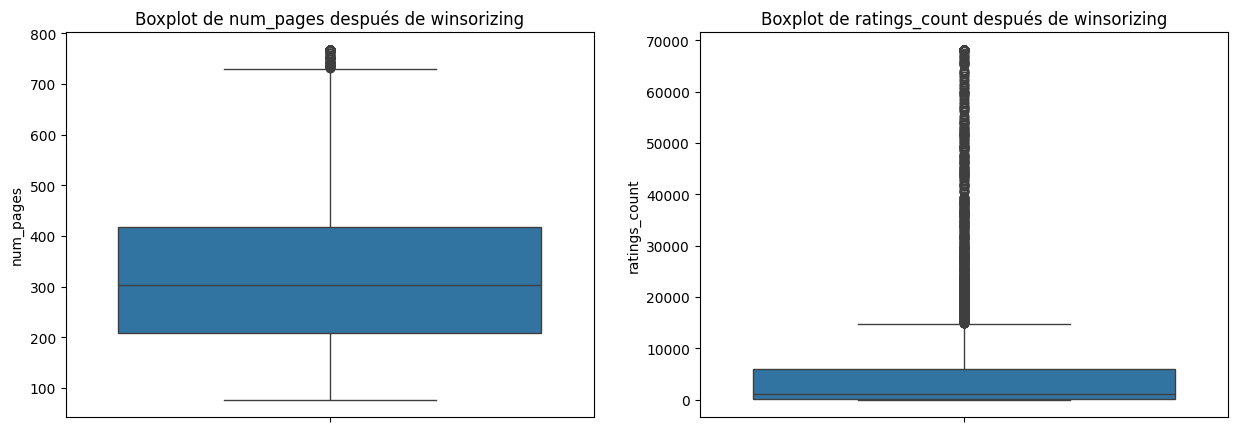

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['num_pages'])
plt.title('Boxplot de num_pages después de winsorizing')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['ratings_count'])
plt.title('Boxplot de ratings_count después de winsorizing')
plt.show()

## Normalización de datos
Los datos tienen algunas incongruencias que podrían afectar a nuestro análisis, por lo que es necesaria la normalización de los datos.

1. Primero ponemos las siguientes columnas en un rango del 0 al 1 para facilitar comparaciones y visualizaciones, para eso usamos MinMaxScaler , para transformar los datos escalanado cada valor individualmentes de forma que queden dentro del rango, luego la asignamos a lavariables scaler para realizar la transformación,

In [21]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ["average_rating", "num_pages", "ratings_count"]
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])  # calcula el valor mínimo y máximo de cada columna y las transforma cada valor con la fórmula X_scaled = (X - X_min) / (X_max - X_min)

df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,no subtitle,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004,0.770,0.246020,0.005117
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000,0.766,0.237337,0.075541
2,9780006163831,0006163831,The One Tree,no subtitle,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982,0.794,0.581766,0.002346
3,9780006178736,0006178731,Rage of angels,no subtitle,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993,0.786,0.629522,0.432838
4,9780006280897,0006280897,The Four Loves,no subtitle,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002,0.830,0.134588,0.493717


Creamos un histograma de Average Rating, para visualizar la distribución de la variable, es una representación gráfica que muestra la frecuencia con la que ocurren los valores en el conjunto de datos.
Importamos la librería seaborn y matplotib para crear los gráficos y personalizarlo.

Text(0.5, 1.0, 'Distribución de average_rating')

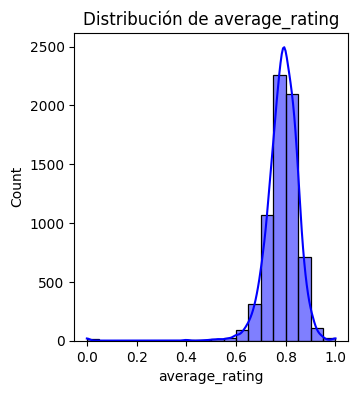

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4)),  #crea la figura
plt.subplot(1, 3, 1)  #subgráfico
sns.histplot(df['average_rating'], bins=20, kde=True, color='blue') #crea el histograma de color azul
plt.title('Distribución de average_rating')

Ahora de Num pages:


Text(0.5, 1.0, 'Distribución de num_pages')

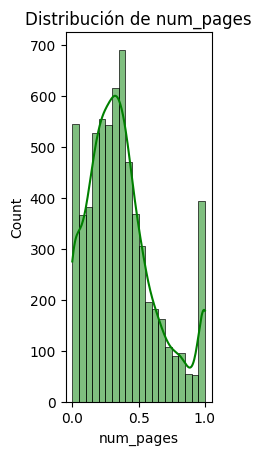

In [23]:
plt.subplot(1, 3, 2)
sns.histplot(df['num_pages'], bins=20, kde=True, color='green')
plt.title('Distribución de num_pages')

## Análisis de correlación

Ya que tenemos variables numéricas limpias y normalizadas , vamos a calcular la matriz entre las variables average_rating, num_pages y ratings_count.
La matriz de correlación sirve para identificar patrones y las relaciones más importantes en los datos.

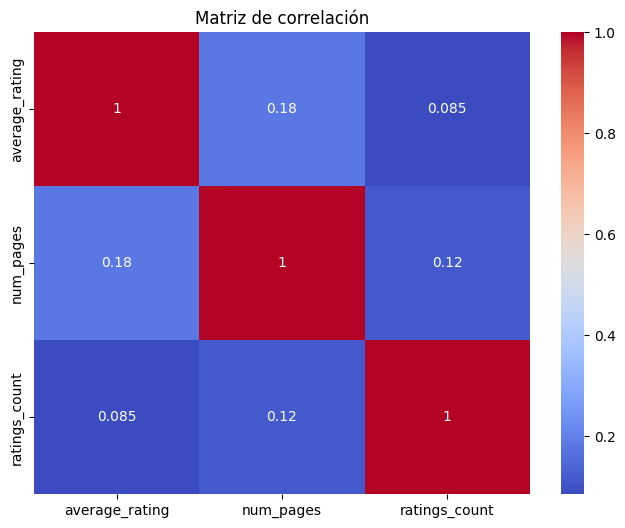

In [24]:
correlation_matrix = df[['average_rating', 'num_pages', 'ratings_count']].corr()

plt. figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

La relación que hemos encontrado no es muy fuerte, eso nos quiere decir que el que un libro sea más largo no implica necesairamente que vaya a tener mucho rating, no encontramos correlaciones fuertes.

## Análisis de categorías

Vamos a revisar las categorías de libros.

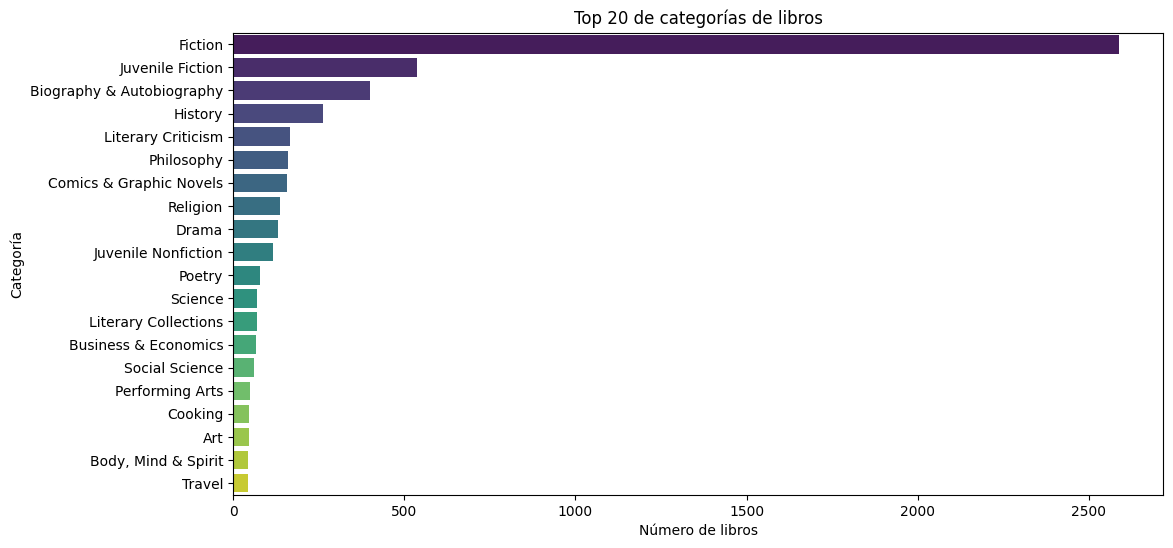

In [27]:
category_counts = df['categories'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index,hue=category_counts.index, palette='viridis', legend=False)
plt.title('Top 20 de categorías de libros')
plt.xlabel('Número de libros')
plt.ylabel('Categoría')
plt.show()


Las categoría predominante en el dataset es la ficción.

## Análisis bivariado

Entre average_rating y categories, para ver cómo varían los ratings promedio entre diferentes categorías de libros.

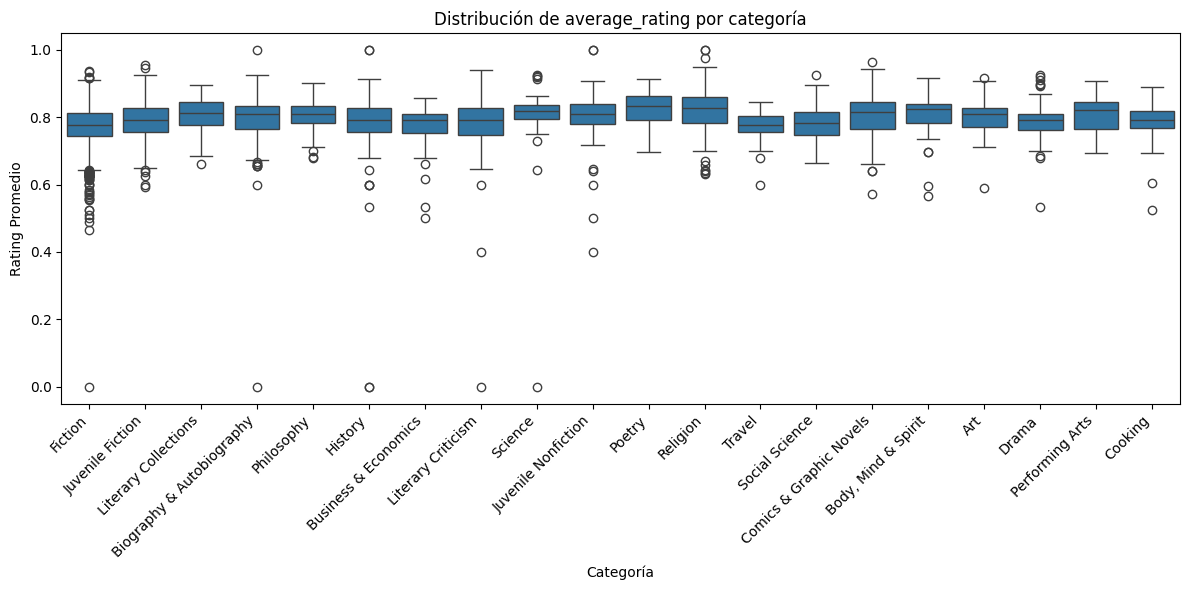

In [29]:
category_counts = df['categories'].value_counts().head(20)
top_categories = category_counts.index
df_top_categories = df[df['categories'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='average_rating', data=df_top_categories)
plt.title('Distribución de average_rating por categoría')
plt.xlabel('Categoría')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Categorías como Poetry, Religion, Philosophy, Biography & Autobiography, Art, Performing Arts y History son las mejor valoradas y  Las que tienen calificaciones altas pero más dispersión Fiction, Juvenile Fiction y Comics & Graphic Novels.